# LDSC in gwaslab

In [1]:
import gwaslab as gl

In [2]:
gl.show_version()

2024/12/20 12:54:52 GWASLab v3.5.4 https://cloufield.github.io/gwaslab/
2024/12/20 12:54:52 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com


## Loading and filter in only Hapmap3 SNPs

In [3]:
t2d = gl.Sumstats("../0_sample_data/t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             build="19",             
             n="N", verbose=False)

In [4]:
t2d.filter_hapmap3(inplace=True)

2024/12/20 12:55:10 Start to extract HapMap3 SNPs...v3.5.4
2024/12/20 12:55:10  -Current Dataframe shape : 12557761 x 11 ; Memory usage: 910.79 MB
2024/12/20 12:55:10  -Loading Hapmap3 variants from built-in datasets...
2024/12/20 12:55:10  -Since rsID not in sumstats, CHR:POS( build 19) will be used for matching...
2024/12/20 12:55:22  -Checking if alleles are same...
2024/12/20 12:55:22  -Variants with macthed alleles: 1092430
2024/12/20 12:55:23  -Raw input contains 1092430 Hapmap3 variants based on CHR:POS...
2024/12/20 12:55:23 Finished extracting HapMap3 SNPs.


## Heritability estimation

In [5]:
# available since v3.4.39
t2d.estimate_h2_by_ldsc(ref_ld_chr = "/home/yunye/tools/ldsc/eas_ldscores/", 
                         w_ld_chr = "/home/yunye/tools/ldsc/eas_ldscores/")

2024/12/20 12:55:23 Start to extract HapMap3 SNPs...v3.5.4
2024/12/20 12:55:23  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 118.32 MB
2024/12/20 12:55:23  -Loading Hapmap3 variants from built-in datasets...
2024/12/20 12:55:24  -rsID will be used for matching...
2024/12/20 12:55:24  -Raw input contains 1092430 Hapmap3 variants based on rsID...
2024/12/20 12:55:24 Start to run LD score regression...v3.5.4
2024/12/20 12:55:24  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 118.32 MB
2024/12/20 12:55:24  -Run single variate LD score regression:
2024/12/20 12:55:24   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2024/12/20 12:55:24   -Please cite LDSC: Bulik-Sullivan, et al. LD Score Regression Distinguishes Confounding from Polygenicity in Genome-Wide Association Studies. Nature Genetics, 2015.
2024/12/20 12:55:24  -Arguments:
2024/12/20 12:55:24   -ref_ld_chr:/home/yunye/tools/ldsc/eas_ldscores/
2024/12/20 12:55:24   -w_ld_chr:/home/yunye/tools/ldsc/e

In [6]:
t2d.ldsc_h2

,h2_obs,h2_se,Lambda_gc,Mean_chi2,Intercept,Intercept_se,Ratio,Ratio_se,Catagories
0,0.10394433,0.00650644,1.32982693,1.49125406,1.09147712,0.01056279,0.18621142,0.02150169,NA


## Genetic correlation

In [7]:
bmi_female = gl.Sumstats("../0_sample_data/bbj_bmi_female.txt.gz",fmt="auto",ea="REF",nea="ALT",rsid="SNP",n=70000, sep="\t",build="19",verbose=False)
bmi_male = gl.Sumstats("../0_sample_data/bbj_bmi_male.txt.gz",fmt="auto",ea="REF",nea="ALT",rsid="SNP",n=80000,sep="\t",build="19",verbose=False)

- other_traits : a list of gl.Sumstats object
- rg : alias for each trait including the main trait

In [8]:
# available since v3.4.39
t2d.estimate_rg_by_ldsc(other_traits=[bmi_female,bmi_male], 
                               rg="T2D,BMI_female,BMI_male",
                               ref_ld_chr = "/home/yunye/tools/ldsc/eas_ldscores/", 
                               w_ld_chr = "/home/yunye/tools/ldsc/eas_ldscores/")

2024/12/20 12:55:43 Start to extract HapMap3 SNPs...v3.5.4
2024/12/20 12:55:43  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 118.32 MB
2024/12/20 12:55:43  -Loading Hapmap3 variants from built-in datasets...
2024/12/20 12:55:43  -rsID will be used for matching...
2024/12/20 12:55:44  -Raw input contains 1092430 Hapmap3 variants based on rsID...
2024/12/20 12:55:44 Start to run LD score regression for genetic correlation...v3.5.4
2024/12/20 12:55:44  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 118.32 MB
2024/12/20 12:55:44  -Run cross-trait LD score regression:
2024/12/20 12:55:44   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2024/12/20 12:55:44   -Please cite LDSC: Bulik-Sullivan, B., et al. An Atlas of Genetic Correlations across Human Diseases and Traits. Nature Genetics, 2015.
2024/12/20 12:55:44  -Arguments:
2024/12/20 12:55:44   -rg:T2D,BMI_female,BMI_male
2024/12/20 12:55:44   -ref_ld_chr:/home/yunye/tools/ldsc/eas_ldscores/
2024/12/20 12:

In [9]:
t2d.ldsc_rg

,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,T2D,BMI_female,0.320668,0.062279,5.148882,2.620433e-07,0.193199,0.012133,1.030609,0.010226,0.019184,0.009454
1,T2D,BMI_male,0.209849,0.060088,3.492357,4.787786e-04,0.175952,0.011384,1.047687,0.010717,0.005353,0.011893


### visualization using plot_rg

2024/12/20 12:55:59 Start to create ldsc genetic correlation heatmap...
2024/12/20 12:55:59 Raw dataset records: 2
2024/12/20 12:55:59  -Raw dataset non-NA records: 2
2024/12/20 12:55:59 Filling diagnal line and duplicated pair for plotting...
2024/12/20 12:55:59 Valid unique trait pairs: 2
2024/12/20 12:55:59  -Valid unique trait1: 1
2024/12/20 12:55:59  -Valid unique trait2: 2
2024/12/20 12:55:59  -Significant correlations with P < 0.05: 2
2024/12/20 12:55:59  -Significant correlations after Bonferroni correction: 2
2024/12/20 12:55:59  -Significant correlations with FDR <0.05: 2
2024/12/20 12:55:59 Plotting heatmap...
2024/12/20 12:55:59 Full cell : fdr-corrected P == 0.05
2024/12/20 12:55:59 P value annotation text (Order: Bon -> FDR -> Pnom): 
2024/12/20 12:55:59  -* : non-corrected P < 0.05 
2024/12/20 12:55:59  -** : fdr-corrected P < 0.05 
2024/12/20 12:55:59  -*** : bon-corrected P < 0.05 
2024/12/20 12:55:59 Start to save figure...
2024/12/20 12:55:59  -Skip saving figure!
20

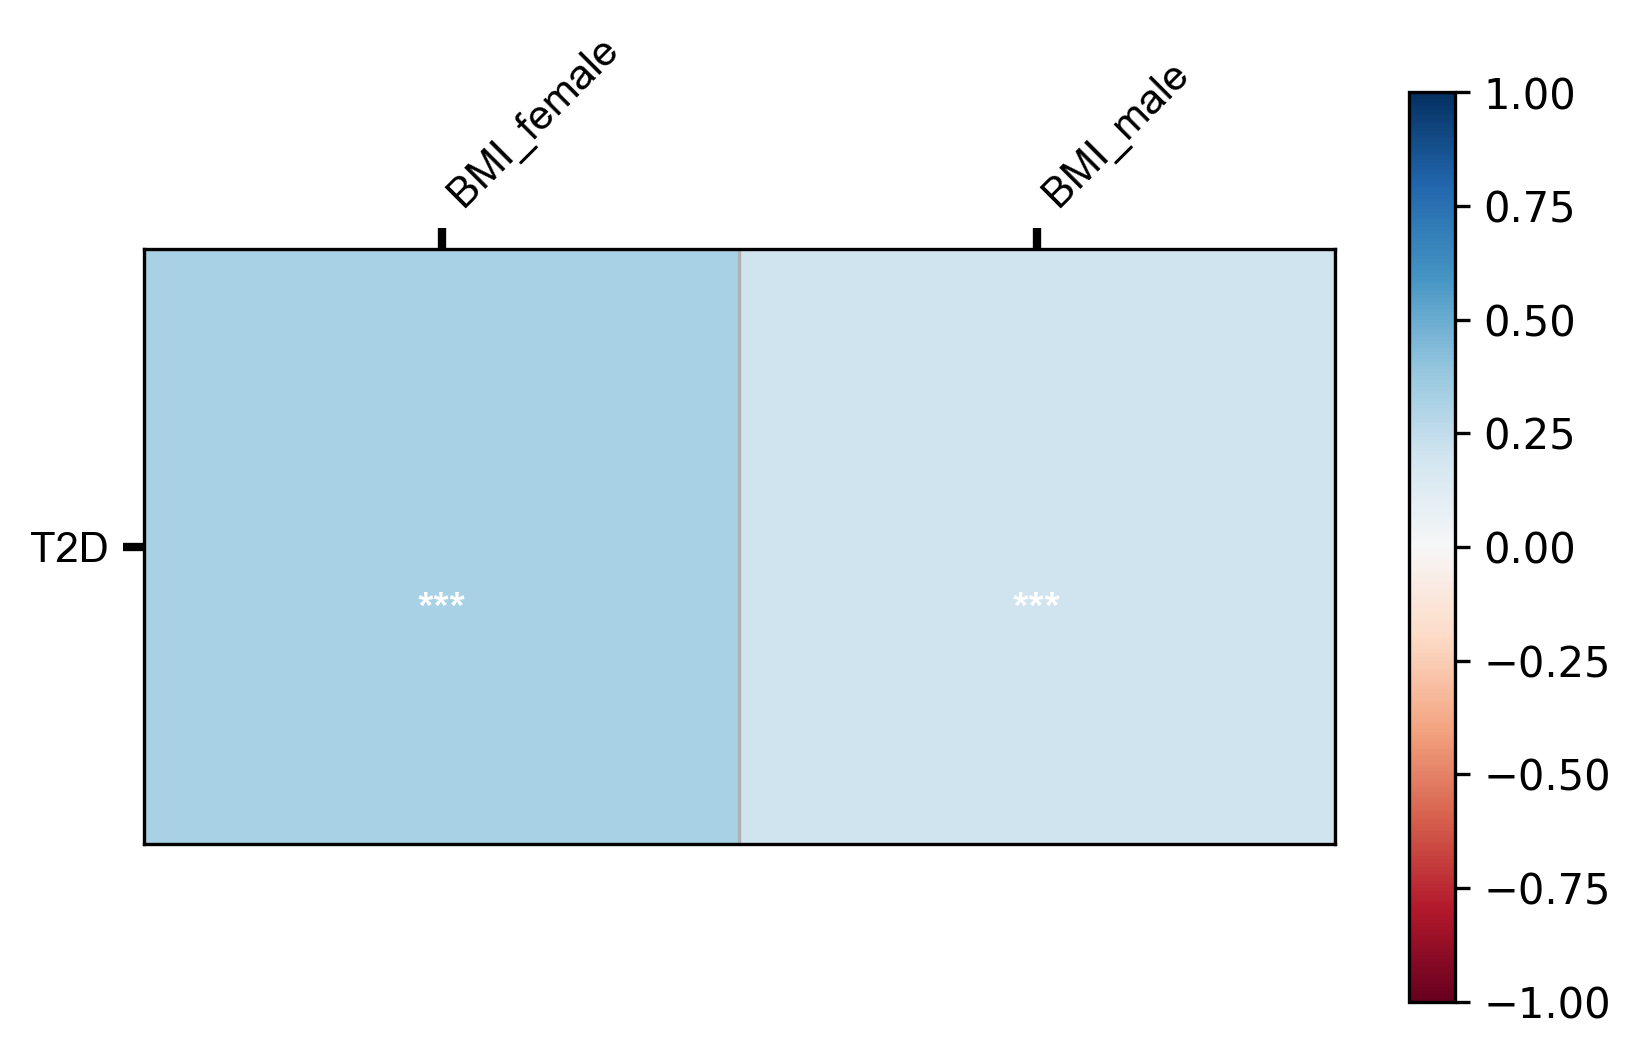

In [10]:
fig, ax, log, df = gl.plot_rg(t2d.ldsc_rg)

## Partitioned h2

In [11]:
# available since v3.4.40
t2d.estimate_partitioned_h2_by_ldsc(       ref_ld_chr = "/home/yunye/tools/ldsc/eas_baseline/baselineLD2_2/baselineLD.", 
                               w_ld_chr = "/home/yunye/tools/ldsc/eas_weights/weights.EAS.hm3_noMHC.",
                               frqfile_chr= "/home/yunye/tools/ldsc/eas_frq/1000G.EAS.QC.",
                               overlap_annot = True, 
                               print_coefficients = True, 
                               print_delete_vals=True)

2024/12/20 12:55:59 Start to extract HapMap3 SNPs...v3.5.4
2024/12/20 12:55:59  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 118.32 MB
2024/12/20 12:55:59  -Loading Hapmap3 variants from built-in datasets...
2024/12/20 12:56:00  -rsID will be used for matching...
2024/12/20 12:56:00  -Raw input contains 1092430 Hapmap3 variants based on rsID...
2024/12/20 12:56:00 Start to run LD score regression...v3.5.4
2024/12/20 12:56:00  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 118.32 MB
2024/12/20 12:56:00  -Run partitioned LD score regression:
2024/12/20 12:56:00   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2024/12/20 12:56:00   -Please cite LDSC: Bulik-Sullivan, et al. LD Score Regression Distinguishes Confounding from Polygenicity in Genome-Wide Association Studies. Nature Genetics, 2015.
2024/12/20 12:56:00  -Arguments:
2024/12/20 12:56:00   -ref_ld_chr:/home/yunye/tools/ldsc/eas_baseline/baselineLD2_2/baselineLD.
2024/12/20 12:56:00   -w_ld_chr:/h

In [12]:
t2d.ldsc_partitioned_h2_summary

,h2_obs,h2_se,Lambda_gc,Mean_chi2,Intercept,Intercept_se,Ratio,Ratio_se
0,0.11773265,0.00727336,1.33210306,1.47668034,1.07649298,0.01228635,0.16047018,0.02577482


In [13]:
t2d.ldsc_partitioned_h2_results

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z-score
0,baseL2_0,1.000000,1.000000,0.000000,1.000000,0.000000,NA,-1.927388e-08,1.156327e-08,-1.666820
1,Coding_UCSC.bedL2_0,0.014196,0.068254,0.034691,4.808050,2.443726,0.118872,-2.544919e-08,9.348275e-08,-0.272234
2,Coding_UCSC.bed.flanking.500L2_0,0.049260,0.072198,0.047989,1.465653,0.974189,0.631156,-9.865231e-09,2.466959e-08,-0.399894
3,Conserved_LindbladToh.bedL2_0,0.024551,0.088877,0.057129,3.620093,2.326953,0.250205,2.010761e-08,9.386840e-08,0.214211
4,Conserved_LindbladToh.bed.flanking.500L2_0,0.305295,0.649833,0.100456,2.128542,0.329046,0.001299,-5.694877e-09,1.189500e-08,-0.478762
...,...,...,...,...,...,...,...,...,...,...
92,Ancient_Sequence_Age_Human_EnhancerL2_0,0.005145,0.078218,0.024054,15.202940,4.675287,0.002975,3.149492e-07,1.103395e-07,2.854366
93,Ancient_Sequence_Age_Human_Enhancer.flanking.5...,0.009070,0.011566,0.026086,1.275182,2.876194,0.923485,5.790740e-09,6.996917e-08,0.082761
94,Human_Enhancer_Villar_Species_Enhancer_CountL2_0,0.066854,0.212233,0.072376,3.174600,1.082602,0.04309,4.797773e-09,5.983189e-09,0.801875
95,Human_Promoter_Villar_ExACL2_0,0.002439,0.056685,0.041189,23.242748,16.889064,0.187759,2.645270e-07,3.249973e-07,0.813936


## Cell type specific 

In [14]:
# available since v3.4.40
t2d.estimate_h2_cts_by_ldsc(ref_ld_chr = "/home/yunye/tools/ldsc/eas_baseline/baseline1_2/baseline.", 
                            ref_ld_chr_cts = "/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Multi_tissue_gene_expr.EAS.ldcts.new",
                            w_ld_chr = "/home/yunye/tools/ldsc/eas_weights/weights.EAS.hm3_noMHC.")

2024/12/20 12:57:14 Start to extract HapMap3 SNPs...v3.5.4
2024/12/20 12:57:14  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 118.32 MB
2024/12/20 12:57:14  -Loading Hapmap3 variants from built-in datasets...
2024/12/20 12:57:15  -rsID will be used for matching...
2024/12/20 12:57:15  -Raw input contains 1092430 Hapmap3 variants based on rsID...
2024/12/20 12:57:15 Start to run LD score regression...v3.5.4
2024/12/20 12:57:15  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 118.32 MB
2024/12/20 12:57:15  -Run cell type specific LD score regression:
2024/12/20 12:57:15   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2024/12/20 12:57:15   -Please cite LDSC: Finucane, H. K., Reshef, Y. A., Anttila, V., Slowikowski, K., Gusev, A., Byrnes, A., ... & Price, A. L. (2018). Heritability enrichment of specifically expressed genes identifies disease-relevant tissues and cell types. Nature genetics, 50(4), 621-629.
2024/12/20 12:57:15  -Arguments:
2024/12/20 12:57

2024/12/20 12:58:59   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.21.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 12:59:01   -Performing regression.
2024/12/20 12:59:04   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.22.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 12:59:06   -Performing regression.
2024/12/20 12:59:08   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.23.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 12:59:10   -Performing regression.
2024/12/20 12:59:12   -Reading cts reference panel LD Score from /home/yunye/to

2024/12/20 13:00:53   -Performing regression.
2024/12/20 13:00:55   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.48.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:00:58   -Performing regression.
2024/12/20 13:01:00   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.49.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:01:03   -Performing regression.
2024/12/20 13:01:05   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.50.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:01:08   -Performing regression.
2024/12/20 13:01:09   -Reading ct

2024/12/20 13:02:58   -Performing regression.
2024/12/20 13:03:01   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.22.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:03:04   -Performing regression.
2024/12/20 13:03:07   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.23.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:03:09   -Performing regression.
2024/12/20 13:03:12   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.24.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:03:15   -Performing regression.
2024/12/20 13:03:18  

2024/12/20 13:05:11   -Performing regression.
2024/12/20 13:05:13   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.49.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:05:15   -Performing regression.
2024/12/20 13:05:18   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.50.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:05:20   -Performing regression.
2024/12/20 13:05:22   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.51.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:05:24   -Performing regression.
2024/12/20 13:05:26  

2024/12/20 13:07:10   -Performing regression.
2024/12/20 13:07:12   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.76.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:07:15   -Performing regression.
2024/12/20 13:07:17   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.77.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:07:19   -Performing regression.
2024/12/20 13:07:21   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.78.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:07:24   -Performing regression.
2024/12/20 13:07:26  

2024/12/20 13:09:06   -Performing regression.
2024/12/20 13:09:08   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.103.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:09:10   -Performing regression.
2024/12/20 13:09:11   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.104.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:09:13   -Performing regression.
2024/12/20 13:09:16   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.105.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:09:18   -Performing regression.
2024/12/20 13:09:2

2024/12/20 13:11:10   -Performing regression.
2024/12/20 13:11:11   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.130.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:11:13   -Performing regression.
2024/12/20 13:11:15   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.131.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:11:17   -Performing regression.
2024/12/20 13:11:20   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.132.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2024/12/20 13:11:22   -Performing regression.
2024/12/20 13:11:2

In [15]:
t2d.ldsc_h2_cts

,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
40,Pancreas,9.460678e-09,3.429194e-09,0.002900
186,A03.556.875.Upper.Gastrointestinal.Tract,9.761378e-09,4.007071e-09,0.007425
149,A03.556.124.526.767.Rectum,9.773394e-09,4.053364e-09,0.007950
70,A03.556.249.249.209.Cecum,9.289977e-09,3.977595e-09,0.009757
152,A03.556.875.875.Stomach,8.648790e-09,3.742879e-09,0.010424
...,...,...,...,...
91,A11.329.228.Fibroblasts,-6.156755e-09,2.852965e-09,0.984537
134,A10.615.550.Mucous.Membrane,-6.220756e-09,2.841565e-09,0.985709
18,Brain_Spinal_cord_(cervical_c-1),-5.433865e-09,2.177073e-09,0.993719
135,A10.690.467.Muscle..Smooth,-7.479103e-09,2.721569e-09,0.997003
